# Clustering Analysis

Here we preform a simple clustering analysis. The goal here is to determine if there are clear 

## Import Packages

In [9]:
# general
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import metrics

## Import Data

Here I import PC and IC data from Dimensionality_Reduction.ipynb

In [10]:
# Import data
pc_df_raw = pd.read_csv('../data/dimensionality_reduction/principal_components.csv')
ic_df_raw = pd.read_csv('../data/dimensionality_reduction/independent_components.csv')

In [11]:
# Simple clustering analysis 
est = KMeans(n_clusters=3,random_state=0)

pc_df = pc_df_raw.copy()

#est.fit(pc_df.drop(columns=['time']))
est.fit(pc_df[['PC1', 'PC2', 'PC3', 'PC4']])
labels = est.labels_

# Plot
fig = plt.figure(0, figsize=(4, 3))
pc_df["clusterID"]=labels.astype('str')
fig = px.scatter_3d(pc_df, x='PC1', y='PC2', z='PC3',color='clusterID')
fig.show()

<Figure size 400x300 with 0 Axes>

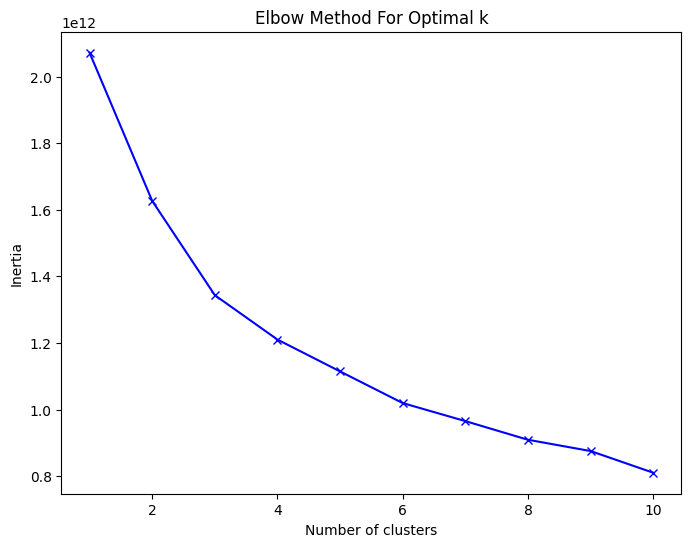

In [12]:
# impliment the elbow method to find the optimal number of clusters
# Implement the elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pc_df[['PC1', 'PC2', 'PC3', 'PC4']])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Silhouette Score: 0.19277414140986934


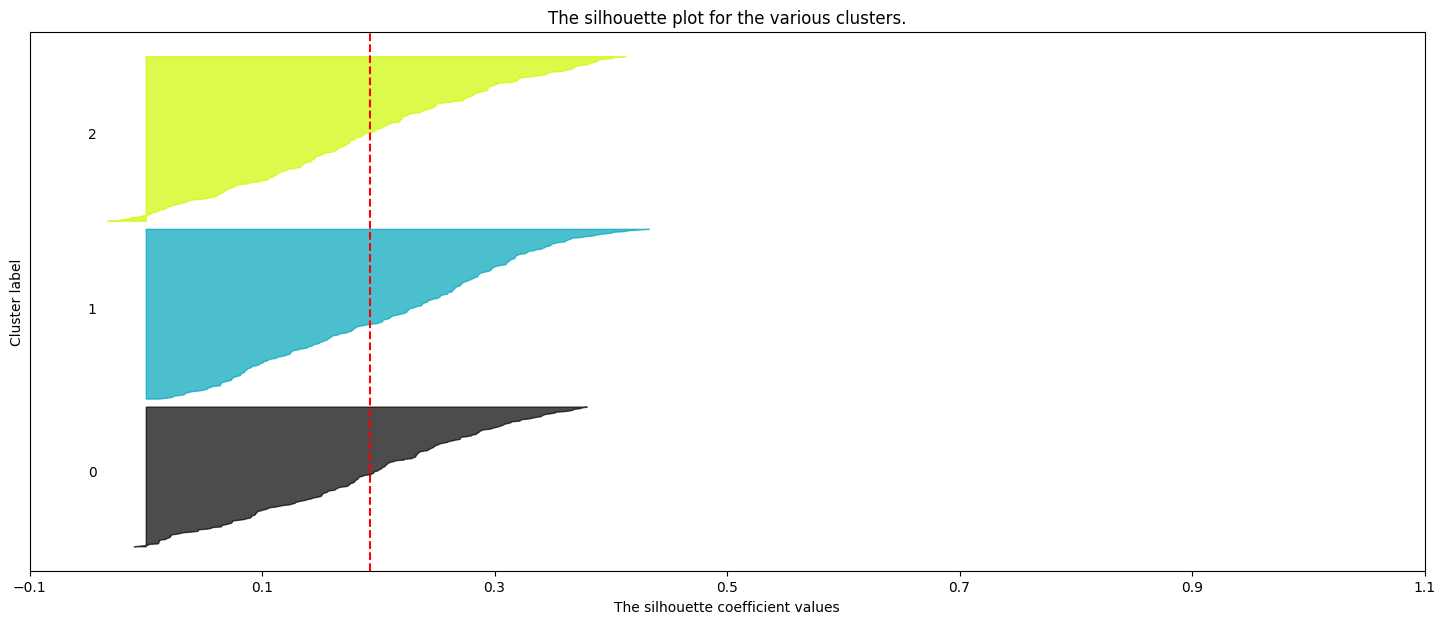

In [13]:
# Silhouette analysis
# Perform silhouette analysis
silhouette_avg = silhouette_score(pc_df[['PC1', 'PC2', 'PC3', 'PC4']], labels)
print(f"Silhouette Score: {silhouette_avg}")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(pc_df[['PC1', 'PC2', 'PC3', 'PC4']], labels)

# Plot silhouette analysis
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

y_lower = 10
for i in range(3):  # Assuming 3 clusters
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()

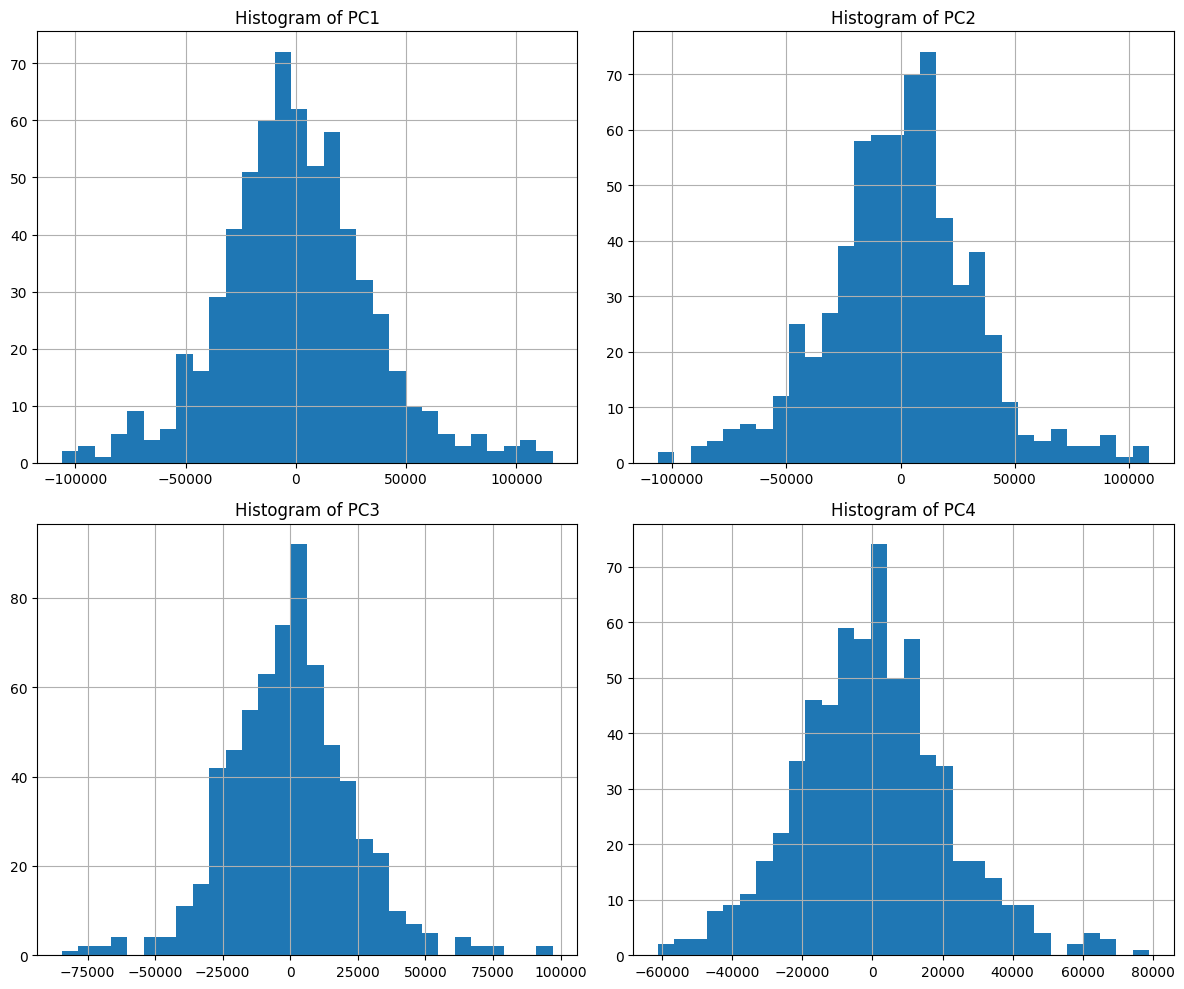

In [14]:
# Plot histograms for PC1 through PC4
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

pc_df[['PC1', 'PC2', 'PC3', 'PC4']].hist(bins=30, ax=axes)

# Set titles for each subplot
axes[0, 0].set_title('Histogram of PC1')
axes[0, 1].set_title('Histogram of PC2')
axes[1, 0].set_title('Histogram of PC3')
axes[1, 1].set_title('Histogram of PC4')

plt.tight_layout()
plt.show()

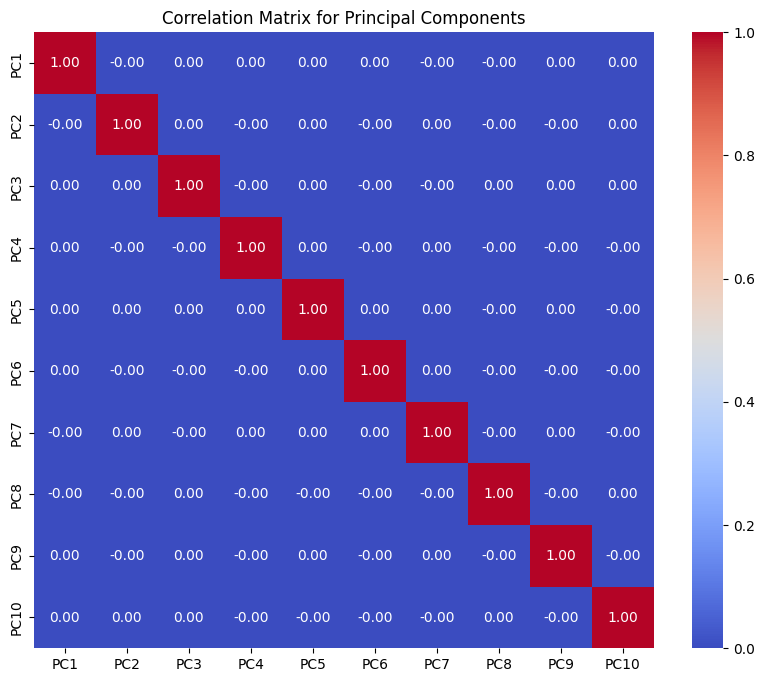

In [15]:
# plot a correlation matrix for all the PCs
# Compute the correlation matrix
corr_matrix = pc_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Principal Components')
plt.show()
